In [13]:
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [15]:
data = pd.read_excel("diabetes - DS.xls")
data.head()

,Unnamed: 0,Unnamed: 1
0,NaN,Data Scientist Test
1,NaN,NaN
2,NaN,NaN
3,NaN,Task - Do a Prediction based on provided data...
4,NaN,"Refer Sheet - ""diabetes"""


In [16]:
xls = pd.ExcelFile("diabetes - DS.xls")
xls.sheet_names

['Task', 'diabetes']

In [17]:
data = pd.read_excel("diabetes - DS.xls", sheet_name="diabetes")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
data.shape


(768, 9)

In [19]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [47]:
x = data.drop("Outcome",axis=1)
y = data["Outcome"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42
)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7532467532467533


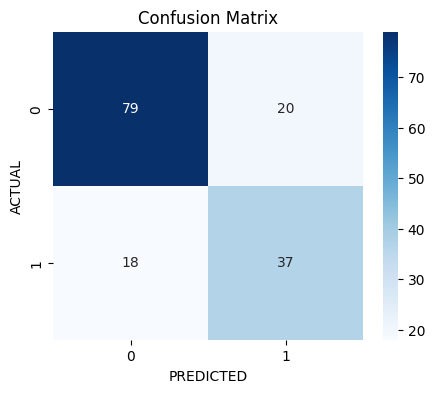

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.title("Confusion Matrix")
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)
print("Random Forest Accuracy : " , accuracy_score(y_test, rf_pred))

Random Forest Accuracy :  0.7207792207792207


ACCURACY IMPROVEMENT

In [32]:
import pandas as pd
import numpy as np


In [33]:
data = pd.read_excel("diabetes - DS.xls", sheet_name="diabetes")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

data[cols] = data[cols].replace(0, np.nan)
data.fillna(data.median(), inplace=True)


In [36]:
from sklearn.linear_model import LogisticRegression


In [37]:
model = LogisticRegression(class_weight='balanced')


In [39]:
model = LogisticRegression(C=1.0, max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [40]:
model = LogisticRegression(class_weight='balanced')


In [42]:
from sklearn.model_selection import cross_val_score


In [48]:
scores = cross_val_score(model, X, y, cv=5)
print("CV Accuracy:", scores.mean())

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

CV Accuracy: 0.7318733554027672


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.svm import SVC

In [50]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [51]:
svc_pred = svc.predict(X_test)


In [52]:
from sklearn.metrics import accuracy_score

svc_acc = accuracy_score(y_test, svc_pred)
print("SVC Accuracy:", svc_acc)


SVC Accuracy: 0.7337662337662337


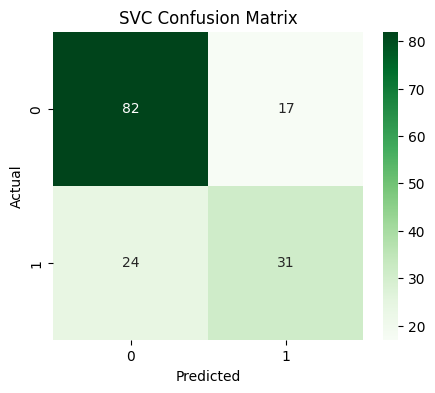

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, svc_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVC Confusion Matrix")
plt.show()


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svc_pred))


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [55]:
from sklearn.model_selection import cross_val_score

svc_scores = cross_val_score(svc, X, y, cv=5)
print("SVC CV Accuracy:", svc_scores.mean())


SVC CV Accuracy: 0.7604702487055428


In [59]:
print("Logistic Regression Accuracy:", accuracy)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SVC Accuracy:", svc_acc)


Logistic Regression Accuracy: 0.7532467532467533
Random Forest Accuracy: 0.7207792207792207
SVC Accuracy: 0.7337662337662337


In [60]:
import pandas as pd

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False)


,0
Glucose,0.258864
BMI,0.169984
Age,0.140931
DiabetesPedigreeFunction,0.123768
BloodPressure,0.088134
Pregnancies,0.076551
Insulin,0.076122
SkinThickness,0.065646


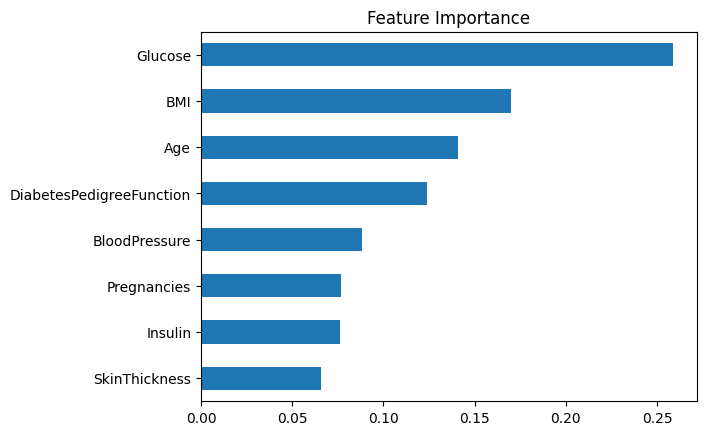

In [61]:
importance.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()


In [62]:
print("Model comparison completed successfully.")


Model comparison completed successfully.
